In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising/Advertising.csv


# ***Simple Linear Regression***

- *In regression analysis; In statistical models involving two or more variables, the cause-effect relationship and the extent to which one or more of the variables affect one or more other variables are investigated. The main purpose is to find the mathematical function that expresses the relationship between dependent and independent variables. The effect of a one-unit variable in the independent variables on the dependent variable is observed.*

---------


- *The mathematical relationship between two or more variables is analyzed by Regression Analysis, and the direction and degree of the relationship is analyzed by Correlation Analysis.*

---------

- *The key point in linear regression is that our dependent value must be continuous while the independent variables must be measurable on a categorical or continuous measurement scale.
In simple linear regression we have one dependent and one independent variable.*

---
---

### Model Equation:


                                              y = b0 + b1x + e

                                - b0 : the point where the line intersects the y-axis 
                                - b1 : slope of the line and regression coefficient 
                                - e : random error value


----
<center><img
src="https://s3.amazonaws.com/revue/items/images/003/917/834/original/lr.png?1544073534" style="width:50%;height:50%;">
</center>

> ## Model

* **I will use the advertising dataset in this example. Let's import the libraries we will use**

In [2]:
# Library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("/kaggle/input/advertising/Advertising.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**We have advertising expenditures and sales data for TV, radio, newspaper. In this study, we will deal with TV and sales variables.**

**Our aim is to model TV-advertisement expenditures and to conduct studies.**

**We determined TV as the independent variable (x) and sales as the dependent variable (y).**

In [4]:
X = data[["TV"]] # independent variable
y = data["sales"] # dependent variable

reg = LinearRegression()
model = reg.fit(X,y)

In [5]:
print("β0 coefficient: ", model.intercept_)
print("β1 coefficient: ", model.coef_)

β0 coefficient:  7.032593549127695
β1 coefficient:  [0.04753664]


> ### R2 Value

---
* **R2 is a value related to the explainability of the model. R2 provides us with the information that we can explain what percentage of the change in the dependent variable when we use the independent variables we have.**

* **The smaller the ratio of the sum of the residuals to the sum of the means, the higher R2 will be.**

In [6]:
print("R2 Value: ", model.score(X,y))

R2 Value:  0.611875050850071


>  ### Regression Chart

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


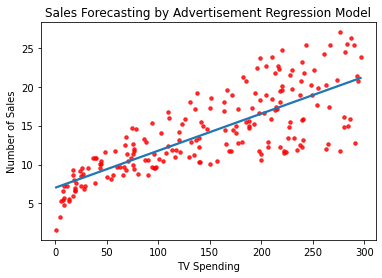

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.regplot(data["TV"], data["sales"], ci=None,scatter_kws={'color':'r','s':12});
g.set_title("Sales Forecasting by Advertisement Regression Model");
g.set_xlabel("TV Spending");
g.set_ylabel("Number of Sales");

> **Prediction**
---

**Let's try to make predictions on the model we have trained. How much will I earn if I invest in TV?**

---
**For example, what is the estimated value of sales when 30 units of TV are spent?**

In [8]:
model.predict([[30]])

array([8.45869276])

### let's estimate for more spending

In [9]:
sales = [[20], [25], [38]]
model.predict(sales)

array([7.98332636, 8.22100956, 8.83898589])

> **Errors and Mean Error Squares**
----

* **Our aim is to minimize the difference between the actual values and the estimated values.**

In [10]:
# let's call our y values
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [11]:
# Let's call a predicted value using the model we have built
model.predict(X)[0:5]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814])

In [12]:
y_ = y[0:10]
y_pred = pd.DataFrame(model.predict(X)[0:10])
df = pd.concat([y_, y_pred], axis=1)
df.columns = ["y_", "y_pred"]
df.head()

,y_,y_pred
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218


In [13]:
# Errors
df["errors"] = df["y_"] - df["y_pred"]
df

,y_,y_pred,errors
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


> ### We do the squaring to prevent positive and negative values from canceling each other out.

In [14]:
df["mean_square"] = df["errors"] ** 2
df

,y_,y_pred,errors,mean_square
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [15]:
# If we take the average of this value
np.mean(df["mean_square"])

9.290350329638102

> ### The mean squared error is our mean error over the data. That is, when we square the difference between the predicted value and the actual value and take the average, we have reached the conclusion that our error is 9.2.

# *Multiple Linear Regression*
---
#### Linear regression analysis is generally examined under two main headings. The simple linear regression we mentioned above is used when a dependent is an independent variable. Multiple linear regression is used when there is one dependent and more than one independent variable.

* Using multiple linear regression analysis; For example, suppose the dependent variable is y: basal metabolic rate and the independent variables are weight, height, and age. In such a study we use the multiple linear regression equation
---
                                                            
                                y = b0 + b1x1 + b2x2 + b3x3 + .... bnxn + e

---

* In multiple linear regression, the relationship between one dependent and more than one independent variable is examined within the framework of the general objectives that we will mention below. The purpose of the research may be to achieve all or any of these objectives.
    * Finding mathematical models for the relationship between the dependent variable and independent variables, identifying the structure between the variables, and summarizing and interpreting the data for regression purposes
    * Find a model that better explains the dependent variable
    * To find which of the independent variables thought to affect the dependent variable or which ones affect the dependent variable more
---
* Multiple linear regression has several assumptions:
    * Errors are normally distributed
    * The errors are independent of each other and there is no autocorrelation between them
    * Variances of error terms for each observation are fixed
    * There is no relationship between the variables and the error term
    * There is no multicollinearity problem between independent variables
---
<center><img
src="https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_1c56/lightboxImage.img.gif/1548704005266.gif" style="width:50%;height:50%;">
</center>

                                                         
                                                           

In [16]:
# we can build the model for multiple linear regression

data = pd.read_csv("/kaggle/input/advertising/Advertising.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
X = data.drop("sales", axis=1)
y = data[["sales"]]

In [18]:
import statsmodels.api as sms
lm = sms.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 16 Sep 2021   Prob (F-statistic):                   2.43e-171
Time:                        21:26:45   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* In this output we can see a summary of many important things.
* I want to mention some metrics here
    - R-squared (uncentered): Our r-squared value is the rate at which the change in the dependent variable can be explained by the independent variables.
    - Adj. R-squared (uncentered): The adjusted r-squared is the corrected version of the r-squared value. When a new variable is added to the r-square data set, it swells, so the perception that r-square improves as a new set is added, this is wrong.
    - Prob (F-statistic): The value used to test the significance of the model. 
    - coef: Beta coefficients
    - std err: Standard error of coefficients
    
----
**now let's build our model using sklearn library and train-test separation**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                   random_state=42)
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
# let's look at our test error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

1.78159966153345

<center><img
src="https://miro.medium.com/max/1400/1*dG6m4wnx3ARPtZPd8qf1tQ.gif" style="width:50%;height:50%;">
</center>

